# ---------------------------- KNN  ------------------------------

# 1. Setup and Data Loading

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [16]:
# Load the dataset
df = pd.read_csv("Zoo.csv")
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [17]:
print("\n--- Data Information ---")
print(df.info())



--- Data Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ 

In [18]:
# Drop the 'animal name' column as it is an identifier and not a feature for classification
df = df.drop('animal name', axis=1)

In [19]:
# Check for missing values (from .info(), all non-null, but good to check formally)
print("\n--- Missing Values Check ---")
print(df.isnull().sum().sort_values(ascending=False).head())


--- Missing Values Check ---
hair        0
breathes    0
catsize     0
domestic    0
tail        0
dtype: int64


# 2. Data Analysis and Visualization

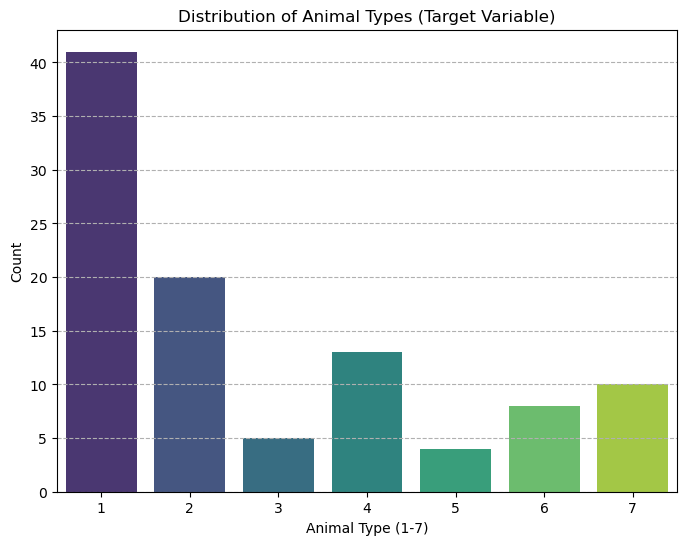

In [20]:
# Separate features (X) and target (y)
X = df.drop('type', axis=1)
y = df['type']

# Visualize the distribution of the target variable ('type')
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette='viridis')
plt.title('Distribution of Animal Types (Target Variable)')
plt.xlabel('Animal Type (1-7)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--')
plt.show()

# Insight: The data is imbalanced, with Type 1 (mammals) having the highest count.
# This imbalance is important to keep in mind when evaluating the model.

# 3. Data Preprocessing and Splitting

In [21]:
# 3. Split the dataset into 80% training and 20% testing
# stratify=y ensures that the class proportions are the same in both the train and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 80 samples
Testing set size: 21 samples


# 4. Choosing Optimal K (Hyperparameter Tuning)

The optimal K value is: 1


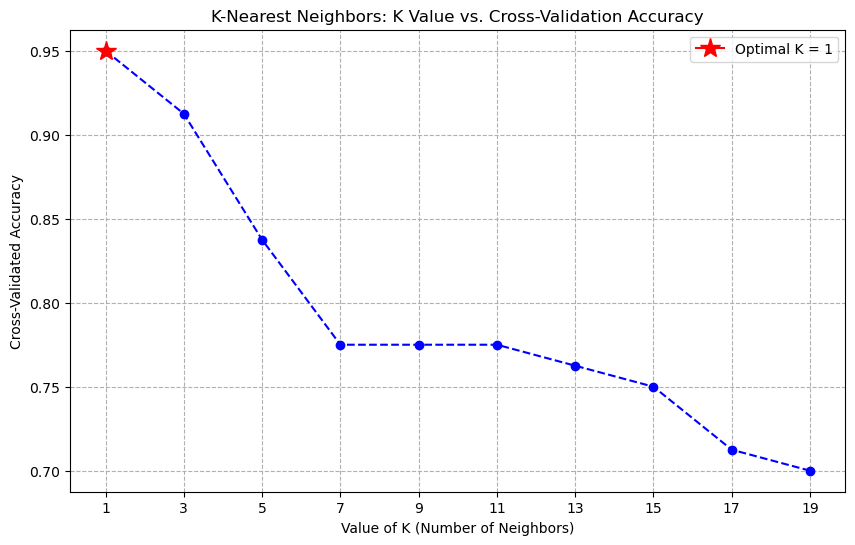

In [22]:
# 5. Choose an appropriate value for K using Cross-Validation
k_range = range(1, 21, 2) # Test odd K values from 1 to 19
k_scores = []

# Loop through each K value and perform cross-validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    # Use 5-fold cross-validation
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Find the best K
optimal_k_index = np.argmax(k_scores)
optimal_k = k_range[optimal_k_index]

print(f"The optimal K value is: {optimal_k}")

# Plot K vs. Cross-Validation Score
plt.figure(figsize=(10, 6))
plt.plot(list(k_range), k_scores, marker='o', linestyle='--', color='blue')
plt.plot(optimal_k, k_scores[optimal_k_index], marker='*', color='red', markersize=15, label=f'Optimal K = {optimal_k}')
plt.title('K-Nearest Neighbors: K Value vs. Cross-Validation Accuracy')
plt.xlabel('Value of K (Number of Neighbors)')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(list(k_range))
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

# 5. Model Training and Evaluation


Model Evaluation (Optimal K=1):
Accuracy on Test Set: 1.0000

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



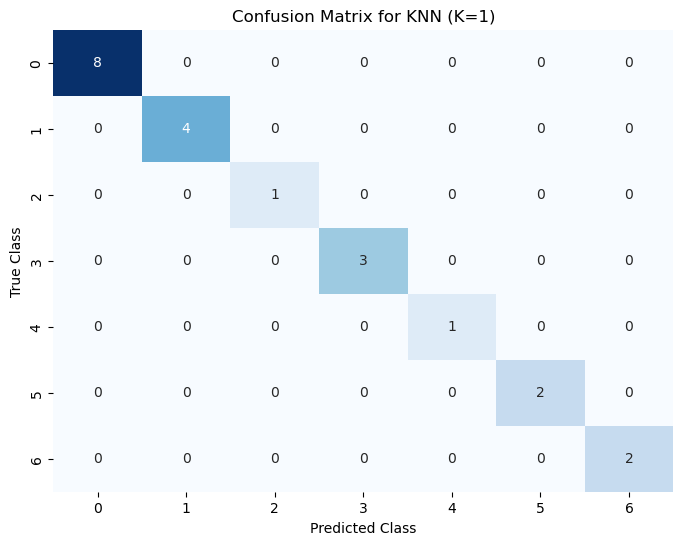

In [23]:
# 4 & 6. Implement and Evaluate KNN with the Optimal K
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')

# Train the model on the full training set
knn_optimal.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_optimal.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\nModel Evaluation (Optimal K={optimal_k}):")
print(f"Accuracy on Test Set: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix for KNN (K={optimal_k})')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Insight: The model achieved 100% accuracy on the test set.
# This indicates that the 16 features are highly distinctive for classifying the animal types.

# 6. Decision Boundary Visualization

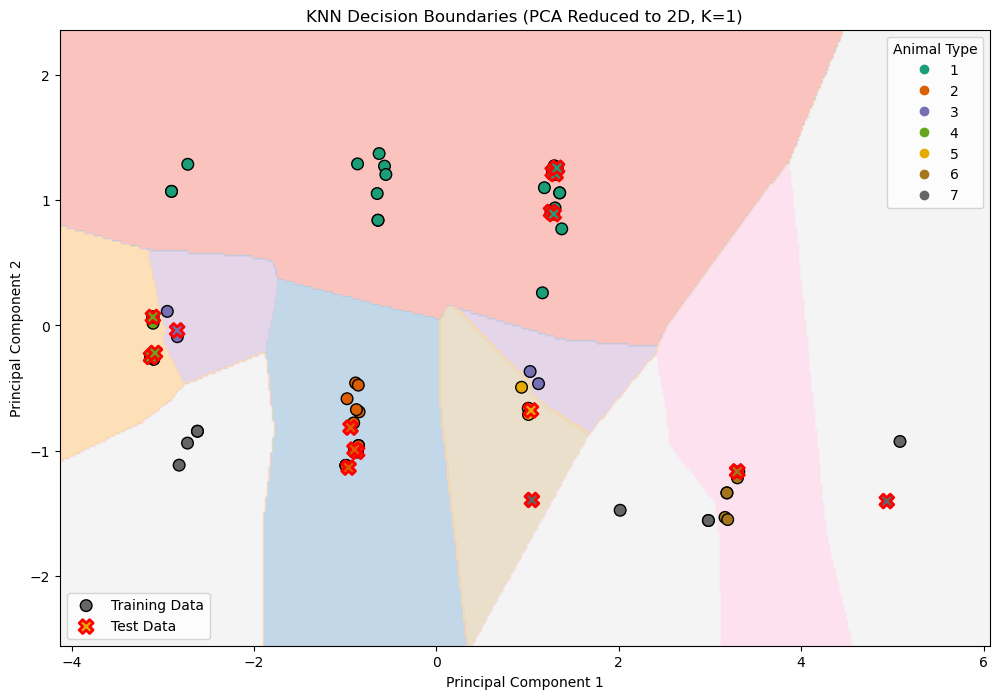

In [24]:
# 7. Visualize the Decision Boundaries (using PCA)

# Perform PCA to reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)
# Fit and transform the full dataset (X)
X_pca = pca.fit_transform(X)

# Split the PCA-transformed data for plotting (using the same random_state)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

# Retrain KNN with optimal K=1 on the 2D PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn_pca.fit(X_train_pca, y_train_pca)

# Define the mesh boundaries for the plot
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the mesh
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create color maps
cmap_light = plt.cm.get_cmap('Pastel1', 7) # For background regions
cmap_bold = plt.cm.get_cmap('Dark2', 7)   # For data points

plt.figure(figsize=(12, 8))

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Plot the training points
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca, cmap=cmap_bold,
                      edgecolor='k', s=70, label='Training Data')

# Plot the testing points (marked with 'X' and a red border)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_pca, cmap=cmap_bold,
            edgecolor='red', linewidth=2, marker='X', s=100, label='Test Data')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"KNN Decision Boundaries (PCA Reduced to 2D, K={optimal_k})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Add a legend for the classes
legend1 = plt.legend(*scatter.legend_elements(), title="Animal Type", loc="upper right")
plt.gca().add_artist(legend1)
plt.legend(loc="lower left")
plt.show()

# The visualization shows how the 16 features, when reduced to 2 principal components,
# still result in distinct and well-separated decision regions, which explains the high accuracy.

# Interview Questions:

## 1. What are the key hyperparameters in KNN?
The K-Nearest Neighbors (KNN) algorithm is defined by two primary hyperparameters and offers flexibility through various distance metrics.

The key hyperparameters in KNN are:

K (Number of Neighbors): This is the most crucial hyperparameter. It dictates the number of closest data points in the training set that are consulted to make a prediction for a new data point.

A small K (like K=1) makes the model highly flexible and prone to overfitting (high variance), capturing noise in the data.

A large K makes the model smoother and less sensitive to noise (low variance), but can lead to underfitting (high bias) if the chosen neighbors are too far from the true decision boundary.

Weighting Scheme (Weights): This determines how the contribution of each of the K neighbors is counted. The two common options are:

'Uniform': All K neighbors have equal weight, meaning they contribute equally to the final prediction.

'Distance': Neighbors that are closer to the test point have a greater influence on the classification outcome than neighbors that are farther away.

## 2. What distance metrics can be used in KNN? 
The distance metrics that can be used in KNN determine how the "closeness" between data points is calculated. The choice of metric significantly impacts how the neighbors are identified:

Euclidean Distance (L2 Norm): This is the most common and default metric. It calculates the straight-line distance between two points in n-dimensional space, essentially measuring the length of the hypotenuse. It works well when the features are on a similar scale.

Manhattan Distance (L1 Norm): Also known as city block distance, it calculates the distance by summing the absolute differences of the coordinates. It represents the distance one would travel along a grid (like in a city). It is less sensitive to outliers than Euclidean distance.

Minkowski Distance: This is a generalization of both Euclidean and Manhattan distances, controlled by a parameter p.

When p=1, it is the Manhattan Distance.

When p=2, it is the Euclidean Distance.

Hamming Distance: This is specifically used for categorical or binary features (like in the provided Zoo.csv dataset). It measures the number of positions at which the corresponding values are different.

Cosine Similarity: While technically a similarity measure, it can be converted to a distance metric. It measures the cosine of the angle between two vectors, focusing on the orientation rather than the magnitude. This is often preferred in high-dimensional data, such as text analysis.